훈련 데이터:  (278, 3)
검증 데이터:  (120, 3)
R^2 결정계수:  0.6895968946794342
X 변수의 계수 a:  [-0.38212538 -0.04709428 -0.00514076]
상수항 b: 46.09948474328234


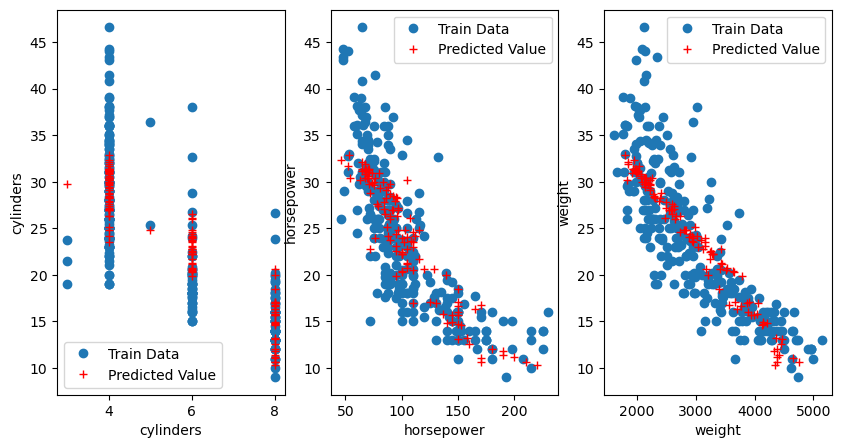

mse:  17.88
mae:  3.33


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 
df['horsepower'] = df['horsepower'].replace('?',np.nan)
df['horsepower'] = df['horsepower'].astype('float')          
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())               
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
X=ndf[['cylinders', 'horsepower', 'weight']] 
y=ndf['mpg'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)
print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
r_square = lr.score(X_test,y_test)
print('R^2 결정계수: ', r_square)
print('X 변수의 계수 a: ', lr.coef_)
print('상수항 b:', lr.intercept_)

y_hat_test = lr.predict(X_test)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i, col in enumerate(X_test.columns):
    axes[i].plot(X_train[col], y_train, 'o', label='Train Data')         
    axes[i].plot(X_test[col], y_hat_test, 'r+', label='Predicted Value')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(col)
    axes[i].legend(loc='best')
    
plt.show()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_hat_test)
print('mse: ', np.round(mse, 2))

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_hat_test)
print('mae: ', np.round(mae, 2))
